In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


data = pd.read_csv(r'C:\Users\victus\OneDrive\Desktop\flower\Iris.csv')
data

data.info()

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Species'] = lb.fit_transform(data['Species'])
data

x = data.iloc[:,:-1]
x.value_counts()

y = data.iloc[:,-1]
y

data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2



Model: Linear Regression
Accuracy: 1.0


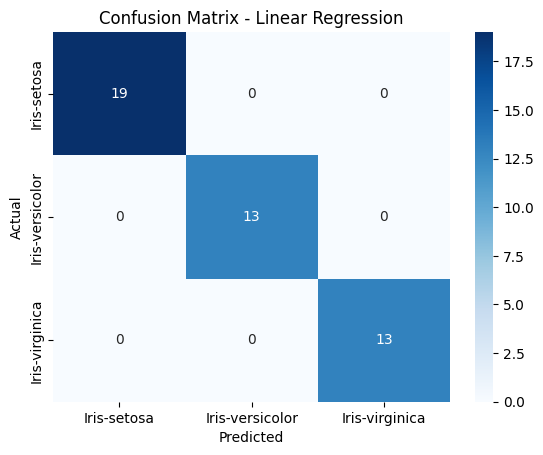


Model: Decision Tree
Accuracy: 1.0


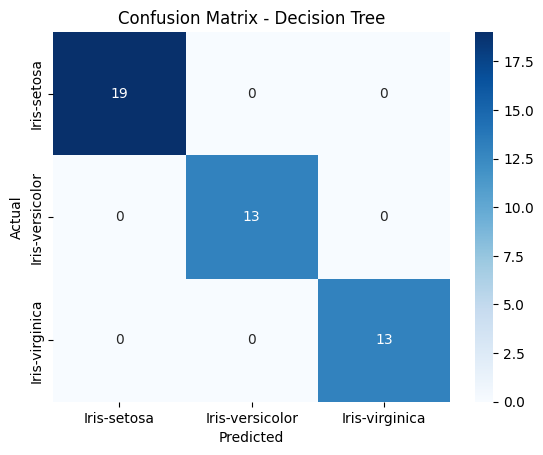


Model: Random Forest
Accuracy: 1.0


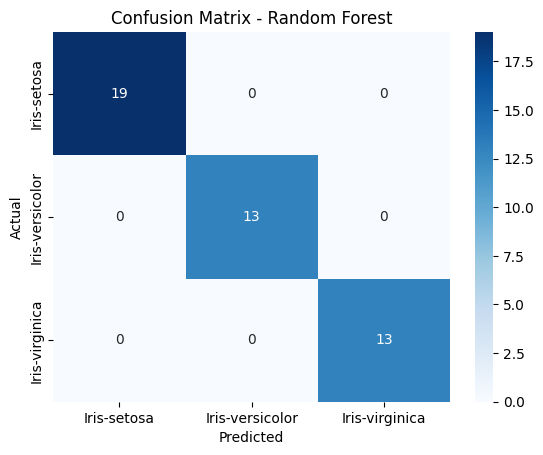

In [2]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Special handling for Linear Regression
    if name == "Linear Regression":
        # Round to nearest integer (class label)
        y_pred = np.rint(y_pred).astype(int)

    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=lb.classes_, yticklabels=lb.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
